# 📊 Fundamentos de métricas y evaluación de usuarios
Sesión 1 - Ciencia de Datos y Producto

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid", palette="pastel")


### 🎯 Objetivo de la sesión
Comprender las métricas clave para evaluar el desempeño del negocio y el comportamiento de los usuarios en productos digitales, y aplicarlas en un ejemplo práctico.


### 1️⃣ Facturación, beneficios y rentabilidad

📘 **Concepto:**  
Métricas financieras que permiten entender la salud económica de un producto o servicio.

💡 **Intuición:**  
¿Estamos ganando dinero? ¿En qué etapa lo ganamos o lo perdemos?

🛠️ **Aplicaciones:**  
Análisis de costos, estrategias de precios y control de márgenes.

### 2️⃣ ROI y ROMI

📘 **Concepto:**  
- ROI = (Beneficio neto − Inversión) / Inversión  
- ROMI = Beneficio bruto generado por campaña / Gasto de campaña

💡 **Intuición:**  
¿Valió la pena la inversión? ¿Cuánto recuperamos por cada peso invertido?

🛠️ **Aplicaciones:**  
Comparación de campañas, canales o productos.

### 3️⃣ Embudos de conversión

📘 **Concepto:**  
Representan las etapas por las que pasa un usuario hasta completar una acción.

💡 **Ejemplo:**  
1000 impresiones → 100 clics → 10 conversiones

🛠️ **Aplicaciones:**  
Diagnóstico de pérdida de usuarios en cada etapa.

### 4️⃣ CTR y CR

📘 **Concepto:**  
- CTR = clics / impresiones * 100  
- CR = conversiones / clics * 100

💡 **Intuición:**  
CTR mide atención; CR mide convencimiento.

🛠️ **Aplicaciones:**  
Evaluación de campañas y páginas de destino.

In [3]:
visits =pd.read_csv("https://raw.githubusercontent.com/zyntonyson/bootcamp_ds_da/refs/heads/main/datasets/visits.csv")
orders =pd.read_csv("https://raw.githubusercontent.com/zyntonyson/bootcamp_ds_da/refs/heads/main/datasets/orders.csv")

URLError: <urlopen error [WinError 10060] Se produjo un error durante el intento de conexión ya que la parte conectada no respondió adecuadamente tras un periodo de tiempo, o bien se produjo un error en la conexión establecida ya que el host conectado no ha podido responder>

In [ ]:
print(visits.info())
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250200 entries, 0 to 250199
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   uuid_user         250200 non-null  object
 1   ts_visits         250200 non-null  object
 2   campaign          250200 non-null  int64 
 3   uuid_interaction  250200 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57546 entries, 0 to 57545
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   uuid_interaction  57546 non-null  object
 1   transaction_ts    57546 non-null  object
 2   items             57546 non-null  int64 
 3   amount            57546 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.8+ MB
None


In [ ]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

visits['ts_visits'] = pd.to_datetime(visits['ts_visits'],errors='coerce')
visits['date_visits'] = visits['ts_visits'].dt.date
visits['dow'] = visits['ts_visits'].dt.day_name()
visits['dow'] = pd.Categorical(visits['dow'], categories=ordered_days, ordered=True)


print( f"Users : {visits.uuid_user.nunique()}")
print( f"Visits : {visits.uuid_interaction.nunique()}")
print( f"Start : {visits.ts_visits.min()}")
print( f"End : {visits.ts_visits.max()}")

Users : 50000
Visits : 250200
Start : 2025-05-05 17:43:52.557041
End : 2025-06-14 17:43:29.557041


* Muestra la cantidad visitas y usuarios por dia (fecha)

* Muestra la cantidad visitas y usuarios por dia de la semana

* Muestra la cantidad visitas y usuarios por campaña

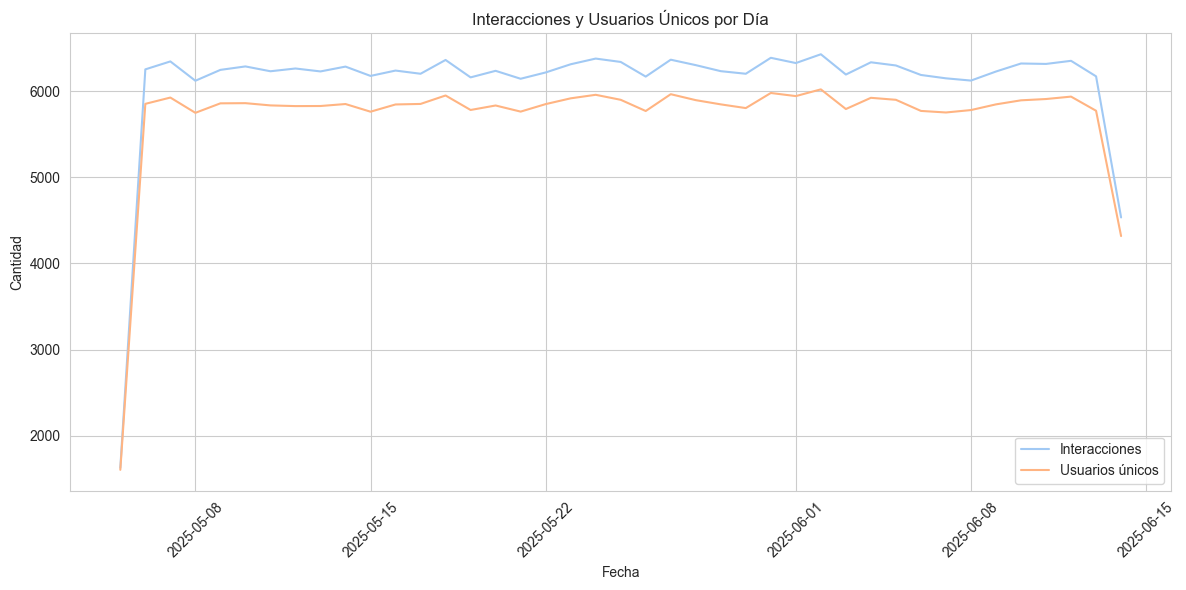

In [ ]:
df=(
    visits
        .assign(
            ts_date = lambda df: df.ts_visits.dt.date
        )
        .groupby(['ts_date'],as_index=False)
        .agg(
            n_interactions =('uuid_interaction','nunique'),
            n_users =('uuid_user','nunique')
        )
)

# Seaborn TS
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ts_date', y='n_interactions', label='Interacciones')
sns.lineplot(data=df, x='ts_date', y='n_users', label='Usuarios únicos')
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.title("Interacciones y Usuarios Únicos por Día")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

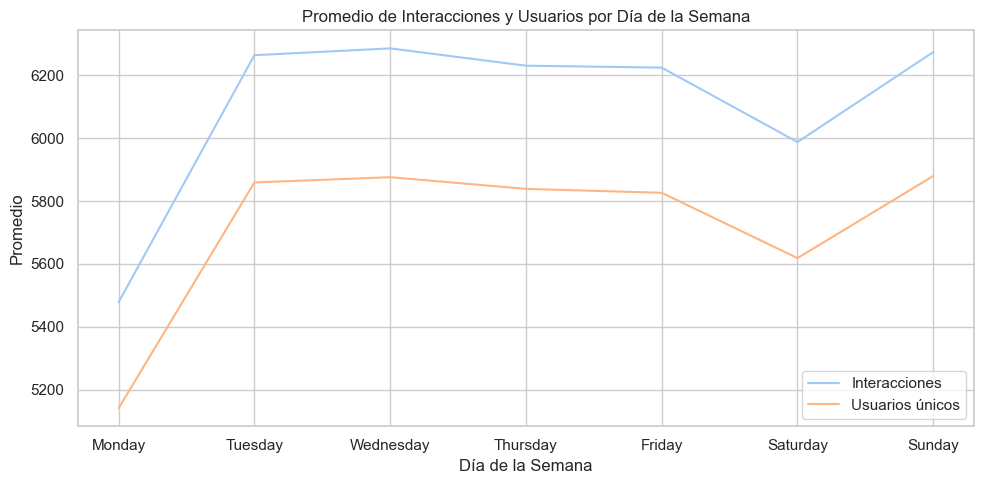

In [ ]:


# Definir orden de días
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Agrupar por día de la semana y calcular el promedio
df_avg = df.groupby('day_of_week', as_index=False)[['n_interactions', 'n_users']].mean()
df_avg['day_of_week'] = pd.Categorical(df_avg['day_of_week'], categories=ordered_days, ordered=True)
df_avg = df_avg.sort_values('day_of_week')

# Estilo pastel
sns.set(style="whitegrid", palette="pastel")

# Graficar con lineplot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_avg, x='day_of_week', y='n_interactions', label='Interacciones')
sns.lineplot(data=df_avg, x='day_of_week', y='n_users', label='Usuarios únicos')

plt.title("Promedio de Interacciones y Usuarios por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Promedio")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Detalles por campaña
(
    visits
    .groupby('campaign')
    .agg(
        n_users =('uuid_user','nunique'),
        n_interactions=('uuid_interaction','nunique')
    )
)

,n_users,n_interactions
campaign,,
1,27639,41456
2,27606,41982
3,27539,41708
4,27547,41510
5,27590,41778
6,27614,41766


In [ ]:
#Campañas/User
(
    visits
    .groupby(['campaign','uuid_user'],as_index=False)
    .agg(
        n_interactions=('uuid_interaction','nunique')
    )
    .groupby(['campaign'],as_index=False)
    .agg(
        n_interactions_avg=('n_interactions','mean')
    )
    .sort_values(['n_interactions_avg'],ascending=[False])
)

,campaign,n_interactions_avg
1,2,1.520756
2,3,1.514507
4,5,1.514244
5,6,1.512494
3,4,1.506879
0,1,1.499910


In [ ]:
# Detalles por campaña
(
    visits
    .groupby('campaign')
    .agg(
        n_users =('uuid_user','nunique'),
        n_interactions=('uuid_interaction','nunique')
    )
)

### 5️⃣ DAU, WAU, MAU

📘 **Concepto:**  
Usuarios activos únicos por día, semana o mes.

💡 **Intuición:**  
Reflejan frecuencia de uso.

🛠️ **Aplicaciones:**  
Evaluar engagement o crecimiento.

### 6️⃣ Sticky Factor

📘 **Concepto:**  
Sticky Factor = DAU / WAU

💡 **Intuición:**  
¿Qué proporción de usuarios regresa cada día?

🛠️ **Aplicaciones:**  
Medición de retención a corto plazo.

### 7️⃣ Duración y frecuencia de sesiones

📘 **Concepto:**  
- ASL: duración promedio de sesión  
- Número de sesiones por usuario

💡 **Intuición:**  
Cuánto tiempo y cuán frecuente usan el producto.

🛠️ **Aplicaciones:**  
Diagnóstico de profundidad de uso.

### 8️⃣ Framework HEART

📘 **Concepto:**  
Evaluación UX: Happiness, Engagement, Adoption, Retention, Task Success

💡 **Intuición:**  
¿Es útil, agradable y efectivo?

🛠️ **Aplicaciones:**  
Medición de experiencia de usuario.

### 9️⃣ Framework AARRR

📘 **Concepto:**  
Ciclo de vida del usuario: Acquisition, Activation, Retention, Referral, Revenue

💡 **Intuición:**  
Detecta cuellos de botella en crecimiento.

🛠️ **Aplicaciones:**  
Diseño de estrategias de producto.

### 🧪 Simulación de datos de campañas de marketing

In [ ]:
import pandas as pd

# Crear dataset simulado
data = {
    "user_id": [101, 101, 101, 102, 102, 103, 103, 103, 104],
    "fecha": ["2025-06-01"] * 9,
    "evento": ["impresion", "clic", "conversion", 
               "impresion", "clic", 
               "impresion", "clic", "conversion", 
               "impresion"],
    "campania": ["A", "A", "A", "A", "A", "B", "B", "B", "B"]
}

df = pd.DataFrame(data)
df


### 📈 Cálculo de CTR y CR por campaña

In [ ]:
# Agrupamos y contamos eventos
pivot = df.pivot_table(index='campania', columns='evento', aggfunc='size', fill_value=0)
pivot["CTR"] = pivot["clic"] / pivot["impresion"]
pivot["CR"] = pivot["conversion"] / pivot["clic"]
pivot[["CTR", "CR"]] * 100  # en porcentaje


### ✅ Conclusión
Este ejercicio ilustra cómo se pueden usar métricas simples para entender el rendimiento de una campaña y el comportamiento de los usuarios. En la siguiente sesión exploraremos análisis más avanzados como cohortes y economía unitaria.